# MLB top hitters analysis (2010-2019)

### All players

In [339]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Merge data from hitters

In [340]:
path = './Hitting_stats'
files = [file for file in os.listdir(path)]

all_hitters_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+'/'+file)
    all_hitters_data = pd.concat([all_hitters_data, current_data])

all_hitters_data.to_csv('all_hitters_stats.csv', index=False)

In [341]:
all_hitters = pd.read_csv('all_hitters_stats.csv')
all_hitters.head()

,Players,Position,Team,Games,At Bats,Runs,Hits,Doubles,Triples,Home Runs,RBI,BB,SO,SB,CS,Average,OBP,SLG,Year
0,Matt Kemp,CF,LAD,162,602,82,150,25,6,28,89,53,170,19,15,0.249,0.310,0.450,2010
1,Ichiro Suzuki,RF,SEA,162,680,74,214,30,3,6,43,45,86,42,9,0.315,0.359,0.394,2010
2,Jose Bautista,RF,TOR,161,569,109,148,35,3,54,124,100,116,9,2,0.260,0.378,0.617,2010
3,Prince Fielder,1B,MIL,161,578,94,151,25,0,32,83,114,138,1,0,0.261,0.401,0.471,2010
4,Chone Figgins,2B,SEA,161,602,62,156,21,2,1,35,74,114,42,15,0.259,0.340,0.306,2010


#### Task 1: Create OPS and SO average column

In [342]:
all_hitters['OPS'] = all_hitters['OBP'] + all_hitters['SLG']
all_hitters.head()

,Players,Position,Team,Games,At Bats,Runs,Hits,Doubles,Triples,Home Runs,RBI,BB,SO,SB,CS,Average,OBP,SLG,Year,OPS
0,Matt Kemp,CF,LAD,162,602,82,150,25,6,28,89,53,170,19,15,0.249,0.310,0.450,2010,0.760
1,Ichiro Suzuki,RF,SEA,162,680,74,214,30,3,6,43,45,86,42,9,0.315,0.359,0.394,2010,0.753
2,Jose Bautista,RF,TOR,161,569,109,148,35,3,54,124,100,116,9,2,0.260,0.378,0.617,2010,0.995
3,Prince Fielder,1B,MIL,161,578,94,151,25,0,32,83,114,138,1,0,0.261,0.401,0.471,2010,0.872
4,Chone Figgins,2B,SEA,161,602,62,156,21,2,1,35,74,114,42,15,0.259,0.340,0.306,2010,0.646


In [374]:
all_hitters['SO average'] = all_hitters['SO'] / all_hitters['At Bats']
all_hitters.head()

,Players,Position,Team,Games,At Bats,Runs,Hits,Doubles,Triples,Home Runs,...,BB,SO,SB,CS,Average,OBP,SLG,Year,OPS,SO average
0,Matt Kemp,CF,LAD,162,602,82,150,25,6,28,...,53,170,19,15,0.249,0.310,0.450,2010,0.760,0.282392
1,Ichiro Suzuki,RF,SEA,162,680,74,214,30,3,6,...,45,86,42,9,0.315,0.359,0.394,2010,0.753,0.126471
2,Jose Bautista,RF,TOR,161,569,109,148,35,3,54,...,100,116,9,2,0.260,0.378,0.617,2010,0.995,0.203866
3,Prince Fielder,1B,MIL,161,578,94,151,25,0,32,...,114,138,1,0,0.261,0.401,0.471,2010,0.872,0.238754
4,Chone Figgins,2B,SEA,161,602,62,156,21,2,1,...,74,114,42,15,0.259,0.340,0.306,2010,0.646,0.189369


#### Task 2: Find best hitters by position

In [344]:
position_hitters = all_hitters.groupby('Position').sum()['Hits']
print(position_hitters)

Position
1B    51165
2B    52634
3B    49199
C     45199
CF    47444
DH    11024
IF       23
LF    56043
OF      651
P      6318
RF    47828
SS    50240
X       998
Name: Hits, dtype: int64


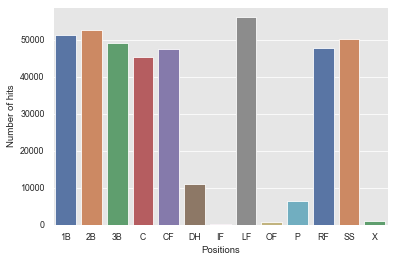

In [420]:
positions = [position for position, df in all_hitters.groupby('Position')]

plt_hittersbar = sns.barplot(x = positions, y = position_hitters, palette="deep")
plt_hittersbar.set(xlabel = "Positions", ylabel = "Number of hits")
plt.show()

#The ShortStops are the best hitters in the MLB
#The catchers are the worst at the plate

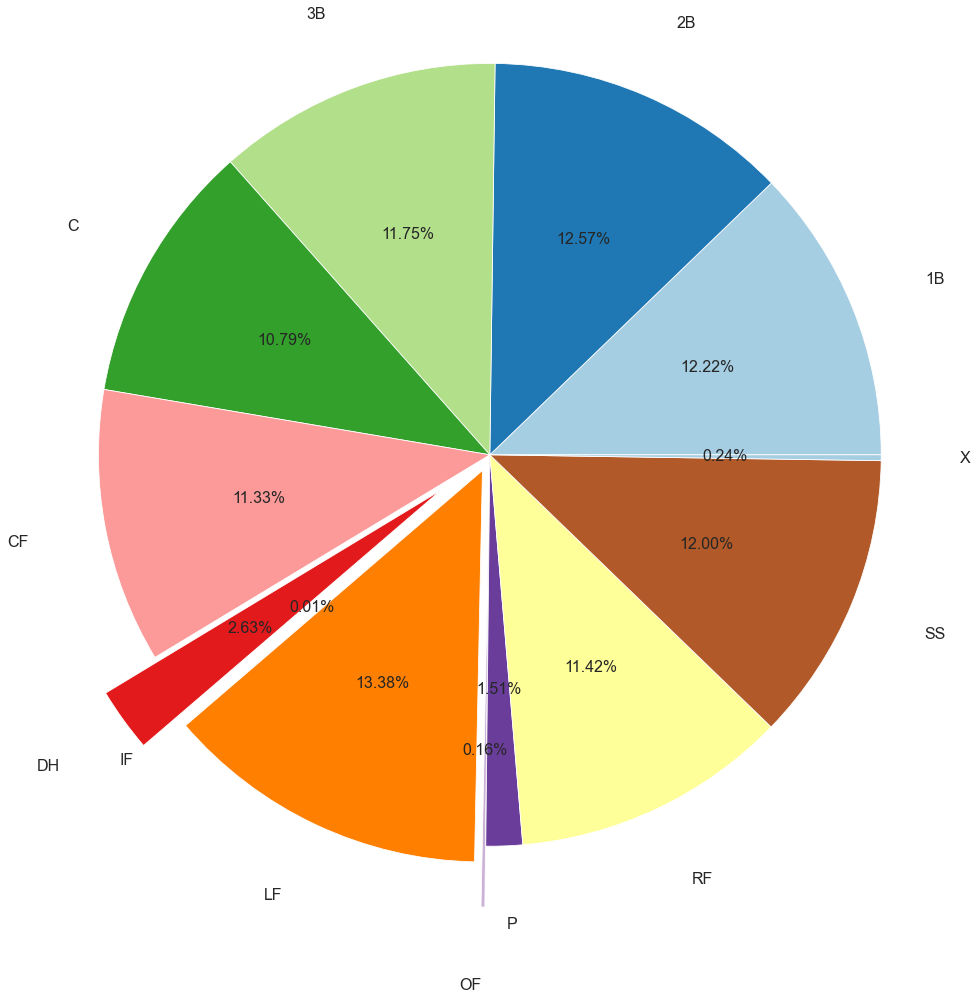

In [471]:
plt.pie(x = position_hitters,
        labels = positions,
        radius = 4.5,
        colors = sns.color_palette("Paired"),
        autopct = "%1.2f%%", 
        textprops={'fontsize': 16}, 
        pctdistance=0.6, 
        labeldistance=1.2,
        explode = (0, 0, 0, 0, 0, 0.7, 0, 0.2, 0.7, 0, 0, 0, 0))
plt.show()

#### Task 3: Find the teams that hits the most and less home runs

In [347]:
teams_hr = all_hitters.groupby('Team').sum()['Home Runs']
teams_mosthr = teams_hr.sort_values(ascending=False)
teams_mosthr.head(5)

Team
NYY    2276
TOR    2124
BAL    2100
TEX    1967
LAD    1907
Name: Home Runs, dtype: int64

In [348]:
teams_lesshr = teams_hr.sort_values()
teams_lesshr.head(6)

Team
--        0
FLA     285
MIA    1014
KC     1331
SD     1417
SF     1420
Name: Home Runs, dtype: int64

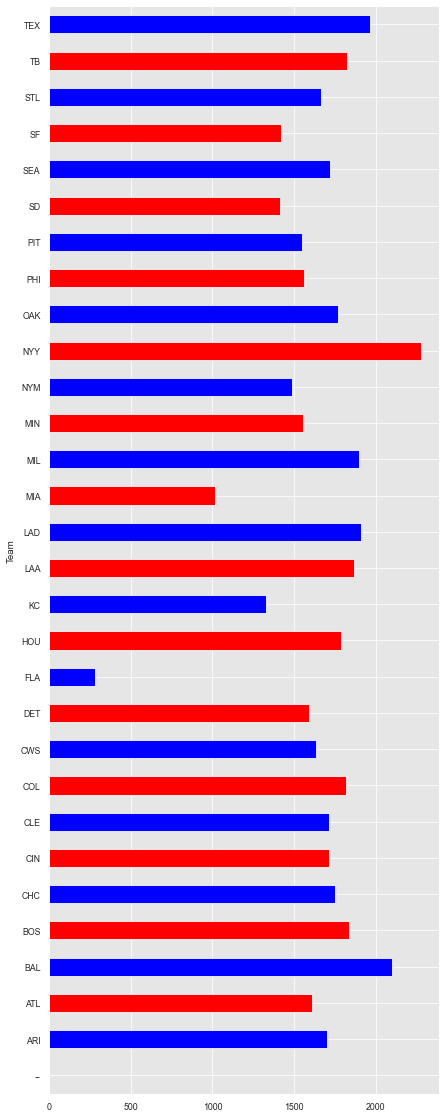

In [473]:
teams = [team for team, df in all_hitters.groupby('Team')]

teams_hr.head(30).plot(kind='barh', figsize=(7,20), color={"red", "blue"})
plt.show()

#### Task 4: Find the players with the most home runs

In [366]:
#Showing the first 10 players with the most home runs
group_playershr = all_hitters.groupby('Players').sum()['Home Runs']
most_hr = group_playershr.sort_values(ascending=False)
most_hr.head(10)

Players
Nelson Cruz          386
Edwin Encarnacion    335
Mike Trout           321
Albert Pujols        318
Giancarlo Stanton    308
Miguel Cabrera       293
Adam Jones           280
Evan Longoria        259
Chris Davis          257
Robinson Cano        251
Name: Home Runs, dtype: int64

#### Task 5: Find the players with the most hits

In [365]:
#Showing the first 10 players with the most hits
group_playershits = all_hitters.groupby('Players').sum()['Hits']
most_hits = group_playershits.sort_values(ascending=False)
most_hits.head(10)

Players
Robinson Cano      1882
Adam Jones         1828
Jose Altuve        1793
Miguel Cabrera     1786
Elvis Andrus       1758
Albert Pujols      1657
Ian Kinsler        1631
Nelson Cruz        1627
Freddie Freeman    1626
Starlin Castro     1617
Name: Hits, dtype: int64

### Giancarlo Stanton trough the years

#### Task 6: Home Runs and hits


In [404]:
all_giancarlo = all_hitters[all_hitters['Players']=='Giancarlo Stanton']
sortGiancarloYears = all_giancarlo.sort_values(by=['Year'], ascending=False)
print(sortGiancarloYears)

                 Players Position Team  Games  At Bats  Runs  Hits  Doubles  \
11659  Giancarlo Stanton       LF  NYY     18       59     8    17        3   
217    Giancarlo Stanton       DH  NYY    158      617   102   164       34   
187    Giancarlo Stanton       RF  MIA    159      597   123   168       32   
7446   Giancarlo Stanton       RF  MIA    119      413    56    99       20   
6365   Giancarlo Stanton       RF  MIA     74      279    47    74       12   
4927   Giancarlo Stanton       RF  MIA    145      539    89   155       31   
3858   Giancarlo Stanton       RF  MIA    116      425    62   106       26   
2675   Giancarlo Stanton       RF  MIA    123      449    75   130       30   
1416   Giancarlo Stanton       RF  FLA    150      516    79   135       30   
478    Giancarlo Stanton       RF  FLA    100      359    45    93       21   

       Triples  Home Runs  ...  BB   SO  SB  CS  Average    OBP    SLG  Year  \
11659        0          3  ...  12   24   0   0   

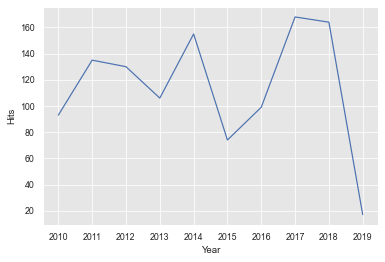

In [416]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt_giancarlo = sns.lineplot(
                             x = 'Year',
                             y = 'Hits', 
                             data=sortGiancarloYears, 
                             #hue = 'Year',
                             #style = 'Year', 
                             #dashes = False
                            )
plt_giancarlo.set(xticks=sortGiancarloYears['Year'])
plt.show()

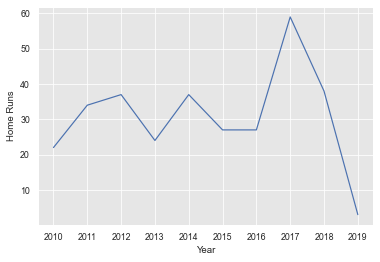

In [474]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt_giancarlo = sns.lineplot(
                             x = 'Year',
                             y = 'Home Runs', 
                             data=sortGiancarloYears, 
                             #hue = 'Year',
                             #style = 'Year', 
                             #dashes = False
                            )
plt_giancarlo.set(xticks=sortGiancarloYears['Year'])
plt.show()

#### Task 7: Batting average

In [406]:
giancarlo_avg = all_giancarlo.sum()['Average'] / len(all_giancarlo)
print("Giancarlo's average trough the decade: %.4f" %giancarlo_avg)

Giancarlo's average trough the decade: 0.2688


#### Task 8: Strikeout average

In [407]:
giancarlo_soavg = all_giancarlo.sum()['SO average'] / len(all_giancarlo)
print("Giancarlo's strikeout average is: %.4f" %giancarlo_soavg)

Giancarlo's strikeout average is: 0.3329


In [411]:
#Show basic statistic information
sortGiancarloYears.describe()

,Games,At Bats,Runs,Hits,Doubles,Triples,Home Runs,RBI,BB,SO,SB,CS,Average,OBP,SLG,Year,OPS,SO average
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,116.200000,425.30000,68.600000,114.100000,23.900000,1.100000,30.80000,78.50000,56.900000,137.500000,4.100000,1.400000,0.26880,0.359700,0.541400,2014.50000,0.901100,0.332889
std,43.832509,166.02279,32.554911,46.586717,9.993887,1.449138,14.37436,32.05984,25.890582,50.401168,3.842742,1.577621,0.01739,0.026179,0.055808,3.02765,0.065421,0.033276
min,18.000000,59.00000,8.000000,17.000000,3.000000,0.000000,3.00000,13.00000,12.000000,24.000000,0.000000,0.000000,0.24000,0.326000,0.480000,2010.00000,0.815000,0.273032
25%,104.000000,372.50000,49.250000,94.500000,20.250000,0.250000,24.75000,63.25000,37.000000,127.250000,1.250000,0.000000,0.25975,0.343750,0.495750,2012.25000,0.846750,0.319290
50%,121.000000,437.00000,68.500000,118.000000,28.000000,1.000000,30.50000,80.00000,60.000000,141.500000,4.500000,1.500000,0.26550,0.358500,0.523000,2014.50000,0.894000,0.334197
75%,148.750000,533.25000,86.500000,150.000000,30.750000,1.000000,37.00000,96.75000,73.000000,165.250000,5.000000,2.000000,0.28625,0.373250,0.593250,2016.75000,0.951500,0.341608
max,159.000000,617.00000,123.000000,168.000000,34.000000,5.000000,59.00000,132.00000,94.000000,211.000000,13.000000,5.000000,0.29000,0.403000,0.631000,2019.00000,1.007000,0.406780
